In [1]:
import numpy as np
import csv
import pandas as pd

In [2]:
train = np.concatenate((np.array(pd.read_csv("./paul_train_features.csv").values)[:,1:3],
                        np.array(pd.read_csv("./paul_train_graph.csv"))),
                       axis=1)

test = np.concatenate((np.array(pd.read_csv("./paul_test_features.csv").values)[:,1:3],
                       np.array(pd.read_csv("./paul_test_graph.csv"))),
                      axis=1)

In [3]:
y_train = np.array(pd.read_csv("./paul_my_train.csv"))[:,2]
y_test  = np.array(pd.read_csv("./paul_my_test.csv") )[:,2]

In [4]:
for i in range(len(train)):
    if train[i,2] == -1:
        train[i,2] = 20

for i in range(len(test)):
    if test[i,2] == -1:
        test[i,2] = 20

In [5]:
test.shape

(123103, 4)

In [6]:
train.shape

(492409, 4)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X=train)

In [10]:
X_test  = scaler.transform(X=test)

In [11]:
from sklearn.neural_network import MLPClassifier
csf = MLPClassifier(hidden_layer_sizes=(200,), early_stopping=True)
csf.fit(X_train, y_train)
csf.score(X_test, y_test)

0.9565729511059844

In [21]:
FP = []
TP = []
TN = []
FN = []
proba_test = csf.predict_proba(X_test)[:,1]
for rate in np.linspace(0,1,100):
    TP.append(sum((proba_test > rate) * (y_test == 1)) / len(y_test))
    FP.append(sum((proba_test > rate) * (y_test == 0)) / len(y_test))
    FN.append(sum((proba_test <= rate)* (y_test == 1)) / len(y_test))
    TN.append(sum((proba_test <= rate)* (y_test == 0)) / len(y_test))

In [22]:
import matplotlib.pyplot as plt

/Users/paulracaniere/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


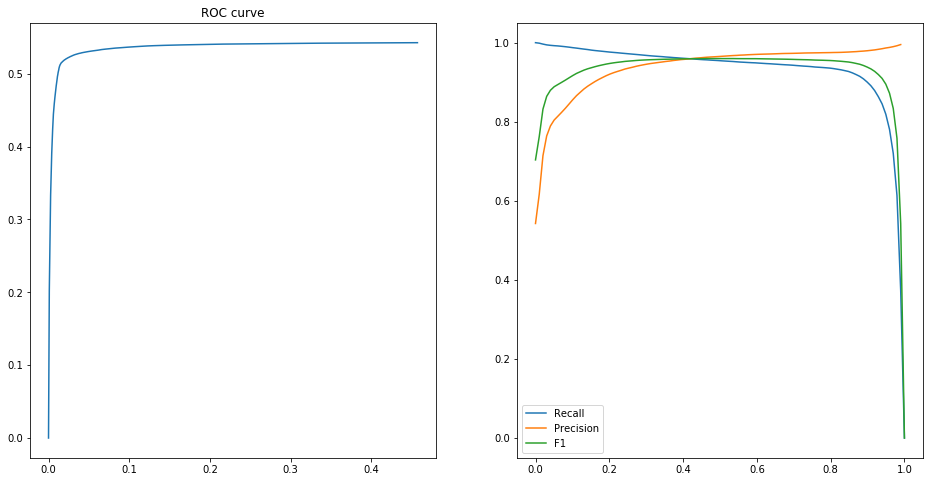

In [26]:
FP = np.array(FP)
TP = np.array(TP)
FN = np.array(FN)
TN = np.array(TN)

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(FP,TP)
plt.title("ROC curve")
plt.subplot(122)
plt.plot(np.linspace(0,1,100), TP/(TP+FN), label="Recall")
plt.plot(np.linspace(0,1,100), TP/(TP+FP), label="Precision")
plt.plot(np.linspace(0,1,100), 2*TP/(2*TP+FN+FP), label="F1")
plt.legend()
plt.show()

In [31]:
np.argsort(2*TP/(2*TP+FN+FP))[::-1][0]

46

In [32]:
(2*TP/(2*TP+FN+FP))[np.argsort(2*TP/(2*TP+FN+FP))[::-1][0]]

0.9598906381444539

In [33]:
np.linspace(0,1,100)[46]

0.4646464646464647

In [35]:
with open("./paul_prediction.csv", "w") as f:
    w = csv.writer(f)
    w.writerow(["ID","category"])
    X = np.concatenate((np.array(pd.read_csv("./paul_kaggle_features.csv").values)[:,1:3],
                        np.array(pd.read_csv("./paul_kaggle_graph.csv").values)),
                       axis=1)
    
    for i in range(len(X)):
        if X[i,2] == -1:
            X[i,2] = 20
    
    y = (csf.predict_proba(scaler.transform(X))[:,1] > 0.4646464646464647)*1
    
    print(y)
    for i, a in enumerate(y):
        w.writerow([i,a])
        

[0 1 1 ... 0 0 0]
